<a href="https://colab.research.google.com/github/svohra10/Project-2-Coding-Dojo/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Set 1


1.   Kaggel 
2.   Traffic congestion measurements across 65 road ways. 


roadways. 

In [20]:
#real data set is commented out due to size
df = pd.read_csv('/content/drive/MyDrive/Part-time Data Science - Python Basics/traffic.csv')
df.head()

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60


3) What is the target?
Congestion 

4) Is this a classification or regression problem?
classifcation 


5) How many features?

4

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848835 entries, 0 to 848834
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   row_id      848835 non-null  int64 
 1   time        848835 non-null  object
 2   x           848835 non-null  int64 
 3   y           848835 non-null  int64 
 4   direction   848835 non-null  object
 5   congestion  848835 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 38.9+ MB


6) How many rows of data.

848834

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

I feel like i will run into issues converting the time to be regressed. Also I feel like there will be issues with the x and y coordinates. 

# Part 2 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848835 entries, 0 to 848834
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   row_id      848835 non-null  int64 
 1   time        848835 non-null  object
 2   x           848835 non-null  int64 
 3   y           848835 non-null  int64 
 4   direction   848835 non-null  object
 5   congestion  848835 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 38.9+ MB


In [21]:
df.describe()

,row_id,x,y,congestion
count,848835.00000,848835.000000,848835.000000,848835.000000
mean,424417.00000,1.138462,1.630769,47.815305
std,245037.70221,0.801478,1.089379,16.799392
min,0.00000,0.000000,0.000000,0.000000
25%,212208.50000,0.000000,1.000000,35.000000
50%,424417.00000,1.000000,2.000000,47.000000
75%,636625.50000,2.000000,3.000000,60.000000
max,848834.00000,2.000000,3.000000,100.000000


In [22]:
df.isnull().sum()

row_id        0
time          0
x             0
y             0
direction     0
congestion    0
dtype: int64

In [23]:
df.duplicated().any()

False

In [28]:
# convert direction into a number
df['direction'].value_counts()

EB    156708
NB    156708
SB    156708
WB    143649
NE     91413
SW     91413
NW     26118
SE     26118
Name: direction, dtype: int64

In [ ]:
dir_df = df['direction']

Create columns for different time variables 

In [34]:
df['time'] = pd.to_datetime(df['time'])

In [36]:
df['day'] = df['time'].dt.day
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df['second'] = df['time'].dt.second

In [40]:
df.head()

,row_id,x,y,direction,congestion,day,month,year,hour,minute,second
0,0,0,0,EB,70,1,4,1991,0,0,0
1,1,0,0,NB,49,1,4,1991,0,0,0
2,2,0,0,SB,24,1,4,1991,0,0,0
3,3,0,1,EB,18,1,4,1991,0,0,0
4,4,0,1,NB,60,1,4,1991,0,0,0


In [38]:
df = df.drop('time', axis = 1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848835 entries, 0 to 848834
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   row_id      848835 non-null  int64 
 1   x           848835 non-null  int64 
 2   y           848835 non-null  int64 
 3   direction   848835 non-null  object
 4   congestion  848835 non-null  int64 
 5   day         848835 non-null  int64 
 6   month       848835 non-null  int64 
 7   year        848835 non-null  int64 
 8   hour        848835 non-null  int64 
 9   minute      848835 non-null  int64 
 10  second      848835 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 71.2+ MB


In [60]:
df['second'].value_counts()

0    848835
Name: second, dtype: int64

In [61]:
df = df.drop('second', axis = 1)

drop seconds due to only being 0

In [42]:
df['direction'].value_counts()

EB    156708
NB    156708
SB    156708
WB    143649
NE     91413
SW     91413
NW     26118
SE     26118
Name: direction, dtype: int64

In [43]:
df['direction'].replace({'EB':0, 'NB':1, 'SB':2, 'WB':3, 'NE':4, 'SW': 4, 'NW':5, 'SE': 6}, inplace=True)
df['direction'].value_counts()

4    182826
0    156708
1    156708
2    156708
3    143649
5     26118
6     26118
Name: direction, dtype: int64

# Visuals

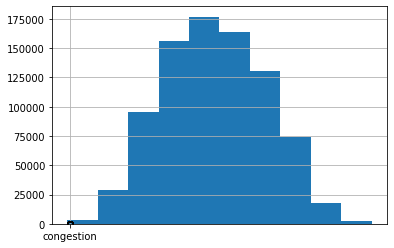

In [32]:
# Create box plot to visualize target variable
df['congestion'].hist();

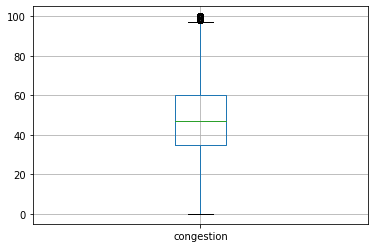

In [31]:
df.boxplot(column = 'congestion')

Some outliers are present in congestion 

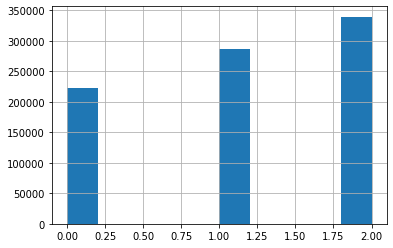

In [44]:
df['x'].hist();

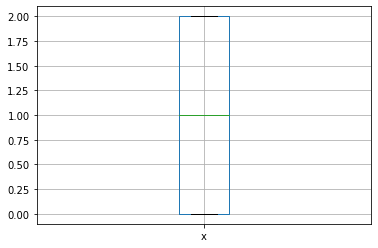

In [45]:
df.boxplot(column = 'x')

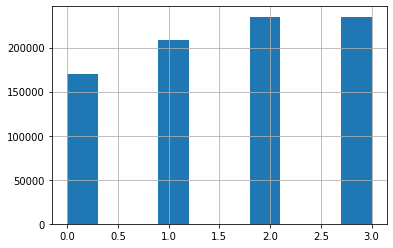

In [46]:
df['y'].hist();

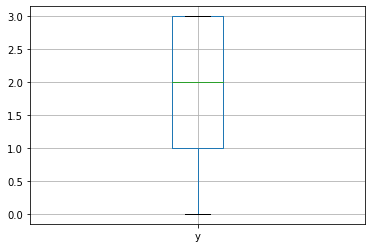

In [47]:
df.boxplot(column = 'y')

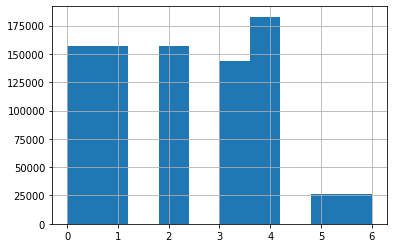

In [49]:
df['direction'].hist();

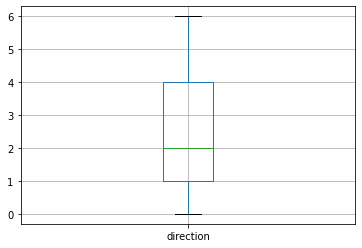

In [48]:
df.boxplot(column = 'direction')

Directions NW and SE less present in the study 

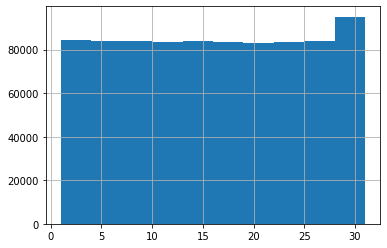

In [51]:
df['day'].hist();

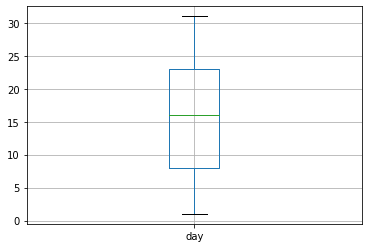

In [50]:
df.boxplot(column = 'day')

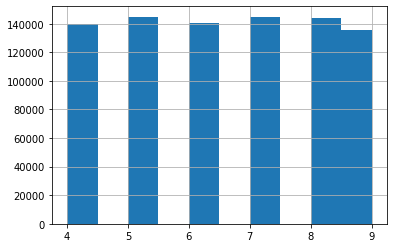

In [55]:
df['month'].hist();

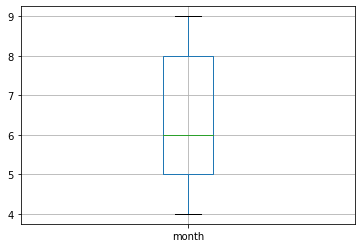

In [54]:
df.boxplot(column = 'month')

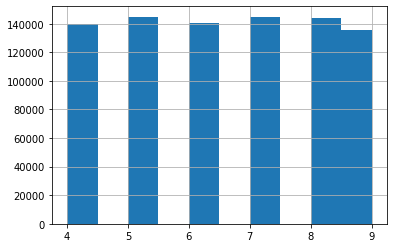

In [56]:
df['month'].hist();

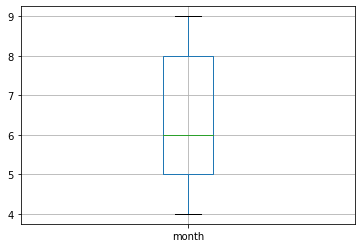

In [57]:
df.boxplot(column = 'month')

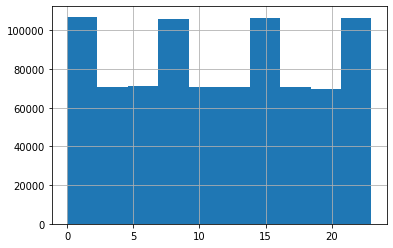

In [59]:
df['hour'].hist();

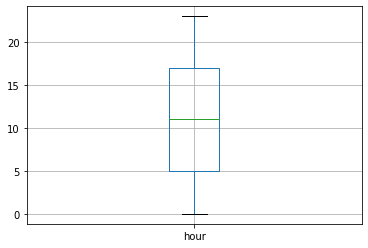

In [58]:
df.boxplot(column = 'hour')

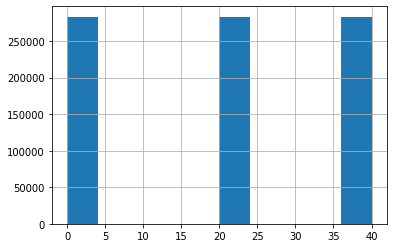

In [62]:
df['minute'].hist();

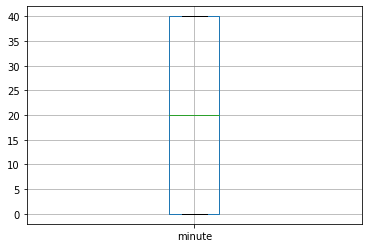

In [63]:
df.boxplot(column = 'minute')